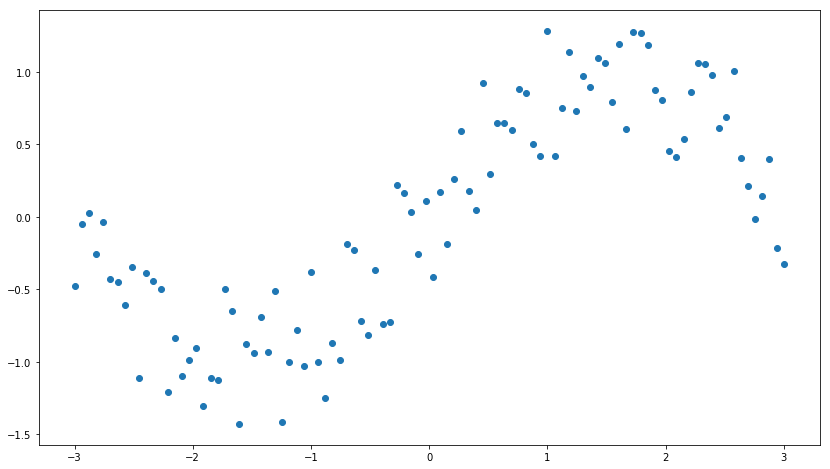

In [33]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(14,8)#可视化时图像的长和宽

n_observations=100  #样本的个数
xs=np.linspace(-3,3,n_observations)
ys=np.sin(xs)+np.random.uniform(-0.5,0.5,n_observations)
plt.scatter(xs,ys) #散点图的绘制
plt.show()  #显示 

## 2.准备好Placeholder

In [34]:
X = tf.placeholder(tf.float32,name='X')
Y = tf.placeholder(tf.float32,name='Y')

## 3.初始化参数/权重

In [35]:
W=tf.Variable(tf.random_normal([1]),name='weight')
b=tf.Variable(tf.random_normal([1]),name="bias")

## 4.计算预测结果

In [36]:
Y_pred=tf.add(tf.multiply(X,W),b)

## 5.计算损失函数

In [37]:
loss=tf.square(Y-Y_pred,name='loss')

## 6.初始化optimizer

In [38]:
learning_rate=0.01
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

## 7.指定迭代次数，并在session里执行graph

In [39]:
n_samples=xs.shape[0]
init=tf.global_variables_initializer()

with tf.Session() as sess:
    #记得初始化所有变量
    sess.run(init)
    writer=tf.summary.FileWriter('./graphs/linear_reg',sess.graph)
    
    #训练模型
    for i in range(50):
        total_loss=0
        for x,y in zip(xs,ys):
            #通过feed_dic把数据灌进去
            _,l=sess.run([optimizer,loss],feed_dict={X:x,Y:y})
            total_loss += l
        if i%5 ==0:
            print("Epoch {0}:{1}".format(i,total_loss/n_samples))
    writer.close()
    W,b=sess.run([W,b])

Epoch 0:[0.5551175]
Epoch 5:[0.20331417]
Epoch 10:[0.20331426]
Epoch 15:[0.20331426]
Epoch 20:[0.20331426]
Epoch 25:[0.20331426]
Epoch 30:[0.20331426]
Epoch 35:[0.20331426]
Epoch 40:[0.20331426]
Epoch 45:[0.20331426]


In [40]:
print(W,b)
print('W:'+str(W[0]))
print('b:'+str(b[0]))

[0.1711701] [-0.20474678]
W:0.1711701
b:-0.20474678


<function matplotlib.pyplot.show(*args, **kw)>

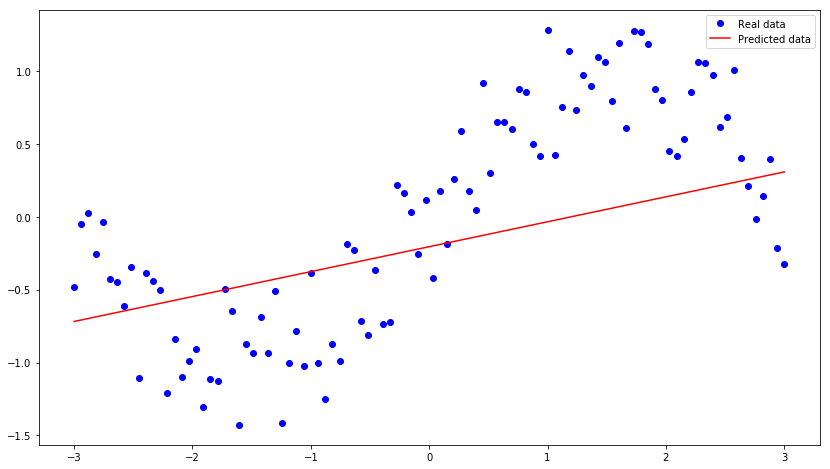

In [41]:
plt.plot(xs,ys,'bo',label='Real data')
plt.plot(xs,xs*W+b,'r',label='Predicted data')
plt.legend()
plt.show